# ML Models for Computer Vision Problems

We will be using the dataset provided by the tensorflow package for the demonstration purposes.

You can download it using the method provided in [this notebook](https://www.tensorflow.org/tutorials/load_data/images).

In [1]:
import tensorflow as tf

In [2]:
len(tf.config.list_physical_devices('GPU'))

1

In [3]:
from random import shuffle

img_width, img_height = 224, 224
num_channels = 3
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
                'data/flower_photos/',
                shuffle=True,
                seed=5,
                validation_split=0.2,
                subset='training',
                image_size=(img_height, img_width),
                batch_size=batch_size)
                
valid_ds = tf.keras.utils.image_dataset_from_directory(
                'data/flower_photos/',
                shuffle=True,
                seed=5,
                validation_split=0.2,
                subset='validation',
                image_size=(img_height, img_width),
                batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [4]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

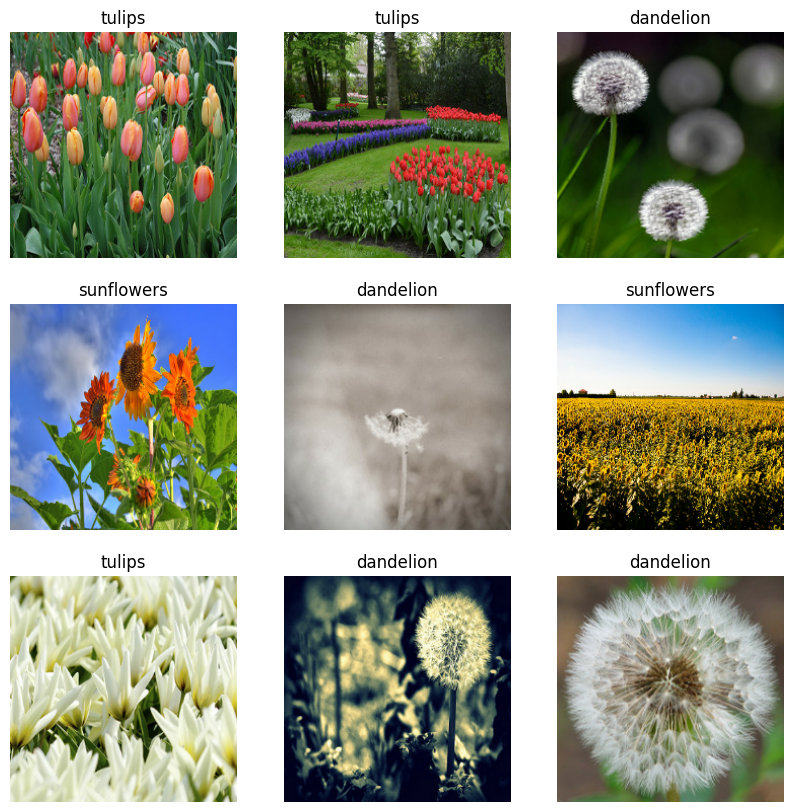

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # Take function returns number of batch size we defined earlier
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [7]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width, num_channels)),
    tf.keras.layers.Dense(len(train_ds.class_names))
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 5)                 752645    
                                                                 
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=10)

Epoch 1/10
92/92 [==============================] - 5s 20ms/step - loss: 5071.0420 - accuracy: 0.3249 - val_loss: 2142.7742 - val_accuracy: 0.3351
Epoch 2/10
92/92 [==============================] - 2s 19ms/step - loss: 2005.2159 - accuracy: 0.3951 - val_loss: 1385.4962 - val_accuracy: 0.4292
Epoch 3/10
92/92 [==============================] - 2s 22ms/step - loss: 1875.9281 - accuracy: 0.4349 - val_loss: 2248.9941 - val_accuracy: 0.3215
Epoch 4/10
92/92 [==============================] - 2s 23ms/step - loss: 1781.7927 - accuracy: 0.4394 - val_loss: 1937.0618 - val_accuracy: 0.4074
Epoch 5/10
92/92 [==============================] - 2s 21ms/step - loss: 1942.9305 - accuracy: 0.4584 - val_loss: 3270.8647 - val_accuracy: 0.4251
Epoch 6/10
92/92 [==============================] - 2s 21ms/step - loss: 1402.9625 - accuracy: 0.5198 - val_loss: 2174.6973 - val_accuracy: 0.3951
Epoch 7/10
92/92 [==============================] - 2s 21ms/step - loss: 1878.5594 - accuracy: 0.4918 - val_loss: 1710

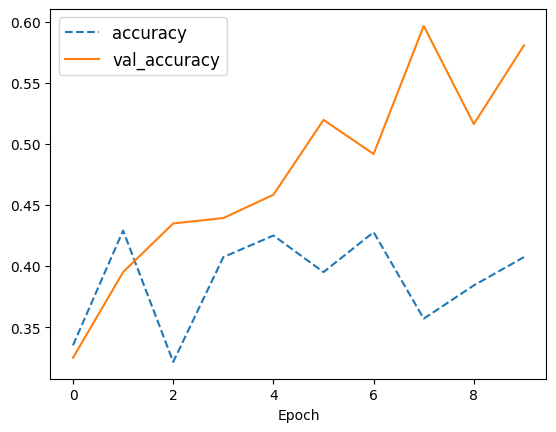

In [11]:
plt.plot(history.history['val_accuracy'], ls='dashed')
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], fontsize=12)

In [16]:
regularizer = tf.keras.regularizers.l1_l2(0, 0.0001)
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width, num_channels)),
    tf.keras.layers.Dense(64, activation='softmax', kernel_regularizer=regularizer),
    tf.keras.layers.BatchNormalization(scale=False, center=False),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(len(train_ds.class_names))
])

model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [17]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                9633856   
                                                                 
 batch_normalization_1 (Batc  (None, 64)               128       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 5)                 85        
                                                      

Epoch 1/10
92/92 [==============================] - 3s 22ms/step - loss: 8.8299 - accuracy: 0.2309 - val_loss: 8.1569 - val_accuracy: 0.2112
Epoch 2/10
92/92 [==============================] - 2s 21ms/step - loss: 6.5959 - accuracy: 0.2381 - val_loss: 5.2554 - val_accuracy: 0.2425
Epoch 3/10
92/92 [==============================] - 2s 21ms/step - loss: 4.3357 - accuracy: 0.2408 - val_loss: 3.5468 - val_accuracy: 0.2425
Epoch 4/10
92/92 [==============================] - 2s 22ms/step - loss: 3.0256 - accuracy: 0.2367 - val_loss: 2.5859 - val_accuracy: 0.2425
Epoch 5/10
92/92 [==============================] - 2s 22ms/step - loss: 2.3044 - accuracy: 0.2364 - val_loss: 2.0689 - val_accuracy: 0.2425
Epoch 6/10
92/92 [==============================] - 2s 22ms/step - loss: 1.9270 - accuracy: 0.2449 - val_loss: 1.8162 - val_accuracy: 0.2112
Epoch 7/10
92/92 [==============================] - 2s 22ms/step - loss: 1.7481 - accuracy: 0.2306 - val_loss: 1.6995 - val_accuracy: 0.2425
Epoch 8/10
92

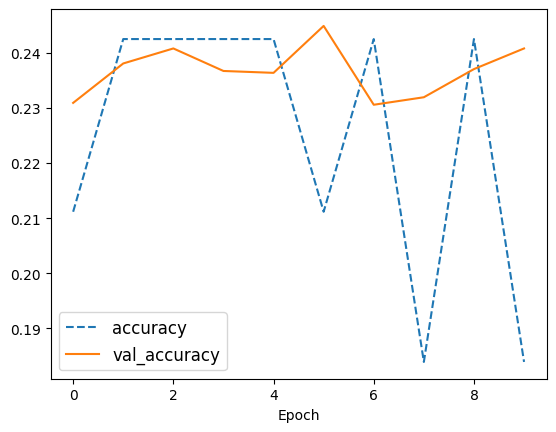

In [18]:
history = model1.fit(train_ds, validation_data=valid_ds, epochs=10)
plt.plot(history.history['val_accuracy'], ls='dashed')
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], fontsize=12)